<a href="https://colab.research.google.com/github/ubaidillah-chem/fouling-ml/blob/main/04_residuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import pandas as pd
df = pd.read_csv('gdrive/MyDrive/dataset_with_residuals.csv')

In [ ]:
high_residual_df = df[(df['Residual'] < -0.15) & (df['Actual_Rf'] < 0.1)] # Get data points with high residual (actual - pred)
high_residual_df[['Run #', 'Time', 'Actual_Rf', 'Predicted_Rf', 'Residual']]

The cluster seems to be from Run 102, from t = 12.0 to t = 21.0. Run 102 has identical operating conditions with Run 113 (proof below) so let's investigate those two.

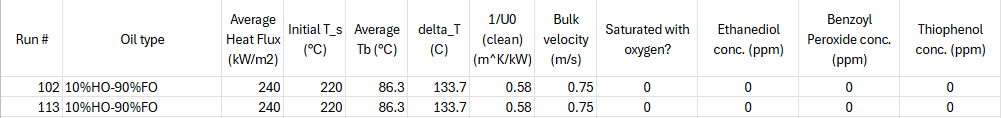

In [ ]:
import matplotlib.pyplot as plt

run102 = df[df['Run #'] == 102]
run113 = df[df['Run #'] == 113]

plt.figure(figsize=(12, 6))
plt.plot(run102['Time'], run102['Actual_Rf'], 'r-', label='Run 102 (Actual)')
plt.plot(run102['Time'], run102['Predicted_Rf'], 'r--', label='Run 102 (Predicted)')
plt.plot(run113['Time'], run113['Actual_Rf'], 'b-', label='Run 113 (Actual)')
plt.plot(run113['Time'], run113['Predicted_Rf'], 'b:', label='Run 113 (Predicted)')
plt.axvspan(12.0, 21.0, color='gray', alpha=0.2, label='Problem Interval')
plt.xlabel('Time (s)')
plt.ylabel('Fouling Factor (Rf)')
plt.legend()
plt.grid(True)
plt.show()

The cluster is from Run 102, from t = 12.0 to t = 21.0. Run 102 and Run 113 have the exact same predicted Rf (they have identical operating conditions), but the actual Rf in Run 102 shoots up after t ~ 11.0, unlike in Run 113.

I say that Run 102 from t = 12.0 to t = 21.0 is an outlier  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get min and max Rf values across all runs for consistent y-axis scaling
min_rf = min(df['Actual_Rf'].min(), df['Predicted_Rf'].min())
max_rf = max(df['Actual_Rf'].max(), df['Predicted_Rf'].max())

# Get all unique run numbers
run_numbers = df['Run #'].unique()
n_runs = len(run_numbers)

# Calculate number of rows needed (4 plots per row)
n_rows = int(np.ceil(n_runs / 4))

# Create subplots
fig, axes = plt.subplots(n_rows, 4, figsize=(15, 3 * n_rows), squeeze=False)
axes = axes.flatten()  # Flatten for easy iteration

# Loop through each run and plot
for i, run_num in enumerate(run_numbers):
    group = df[df['Run #'] == run_num]
    ax = axes[i]

    # Plot Actual and Predicted Rf
    ax.plot(group['Time'], group['Actual_Rf'], label=f'Run {run_num} (Actual)')
    ax.plot(group['Time'], group['Predicted_Rf'], '--', label=f'Run {run_num} (Predicted)')

    # Set consistent y-axis limits
    ax.set_ylim(min_rf, max_rf + 0.04)

    # Customize subplot
    ax.set_title(f'Run {run_num}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Rf')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()